# Overwatch: Predicting Competitive Rank

## Background

Overwatch Origins Edition was released on May of 2016 for Windows, PS4 and Xbox One, by Blizzard Entertainment. Blizzard is known for their Massive Multiplayer Online (MMO) and stragety based games, like World of Warcraft, Heroes of the Storm, and StraCraft. Overwatch features a team based first-person shooter with 26 characters split between four group classifications; Offense, Defense, Tanks, and Support. The structure of the game is based on team work to capture objectives and
transport cargo objectives, or hold capture points. The games design has a variety of modes to choose from, depending on the players preferred gaming style; Arcade mode, which presents challenges for a player to play solo or as a team, Quickplay mode, where players are queued with other players in non-ranked matches for the maps objectives, and Competitive mode, where players are queued with other players based on skill rating for map objectives and is only available during seasons.

Since it's release, the game has grown in popularity, with the most recent player count at 35 million in October of 2017, according to statista.com (2017) and pcgamesn.com (2017). Overwatch has entered into the esports community with the launch of Overwatch League (overwatchleague.com/en-us/) in 2018, showcasing the top competitive players in the Overwatch community. The competitive players are determined through the games Skill Rating system in Competitive matches, ranging from 1 to 4000+ (overwatch.gamepedia.com/Competitive_Play), with Bronze being the lowest and Grand Master being the highest (outside of the top 500 for the region).

With the demomstrated interest from the gaming community on Overwatch League, at 10 million viewers in the League's first week (dotesports.com/overwatch/news/overwatch-league-10-million-viewers-20274), Competitive Overwatch is a popular game mode. As a regular gamer, and an Overwatch fan, I regularly participate in Competitive matches, and I am working to rise in the ranks with each passing season. During my time playing Overwatch Competitive, I have tried to maintain a balance in the number of characters I play well, with the hope this will help me raise my Skill Rating. The Skill Rating system has been a topic in numerous gaming threads on reddit and Overwatch forums, as the community tries to determine the best way to rise in the ranks. My goal is to determine what is the best way to increase a player's skill rating, thus their Competitive Rank, by analyzing player's Overwatch console data.

---
## Problem Statement

**Does having the flexibility to play 2-3 characters increase your chances of a higher Skill Rating (SR), or should a player focus on 1 character and master them for a higher SR? Can I predict a player's SR from the number of characters they have played, by analyzing the total number of games played and the total wins/loss/ties for each character, from a span of three seasons? **

---
### Hypothesis

I believe that having the flexibilty to play 2-3 characters, well, provides a player the ability to adapt to a competitive match's team composition by filling in the needed group classification for that match. By creating a balanced team, the chances of winning the match increases, thus providing the player with a higher SR through out their competitive season.

By analyzing a player's game data, I will be able to predict their future seasons SR based on the number of characters they've played and the total games played with each character over a season. 


---
## Data
The data for this project was obtained by contacting Blizzard Entertainment through Omnicmeta.com. The data was provided for Season 5, 6, and 7 for about 100k players on combined Xbox/PS4 console. The data columns contain the player id (numerically randomized), SR, and wins/losses/ties for each hero (26 x 3).

The data is classified as confidential by the Blizzard and therefore can not be made public. Using a python script, I have created a dummy data set, with similar data to use as a representation of the data prepping work I will be performing on the data obtained from Omnicmeta. The final results will reflect the data from Omnicmeta.

---
### Data Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Create path for csv file
url = 'C:\Users\Chupi\Documents\GADataScience\Project_Work\OverwatchRankingsProject\owdata_dummy.csv'
#creating dataframe for the dummy data
OW = pd.read_csv(url, skipinitialspace = True)
OW.head()

,player_id,skillrating,Genji_wins,Genji_losses,Genji_ties,McCree_wins,McCree_losses,McCree_ties,Pharah_wins,Pharah_losses,...,Zenyatta_ties,Orisa_wins,Orisa_losses,Orisa_ties,Doomfist_wins,Doomfist_losses,Doomfist_ties,Moira_wins,Moira_losses,Moira_ties
0,2,2258,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,2,0,0
1,3,808,0,0,0,5,0,0,0,2,...,6,0,0,0,4,0,0,0,0,0
2,4,3408,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,2021,0,103,87,139,0,0,0,0,...,75,123,0,0,0,0,0,0,0,0
4,6,1562,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


---
### Processing the data
Because the data is so large, we need to reduce the amount of information we have by creating new columns for the total number of games played in the season, total number of games played by each character divided by the total number of games played, and then, the total characters played for each season. The ultimate goal is to have a dataframe with 5 columns as follows:

* Player
* SR
* Rank status
* Total Games Played
* Total Characters played

This will require several steps. First we want to find the total number of games played by each player. This was acheived by creating a list of columns from the df, with each character name. This column was then added to the end of the dataframe

---

In [2]:
# Adding a new column totalGames that is the sum of the character columns 
col_list = list(OW.columns.values)

col_new = col_list[2:79]
OW['totalGames'] = OW[col_new].sum(axis = 1)

OW.head()

,player_id,skillrating,Genji_wins,Genji_losses,Genji_ties,McCree_wins,McCree_losses,McCree_ties,Pharah_wins,Pharah_losses,...,Orisa_wins,Orisa_losses,Orisa_ties,Doomfist_wins,Doomfist_losses,Doomfist_ties,Moira_wins,Moira_losses,Moira_ties,totalGames
0,2,2258,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,2,0,0,79
1,3,808,0,0,0,5,0,0,0,2,...,0,0,0,4,0,0,0,0,0,233
2,4,3408,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,476
3,5,2021,0,103,87,139,0,0,0,0,...,123,0,0,0,0,0,0,0,0,646
4,6,1562,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,443


---

Here, we create a new empty dataframe that woud allow us to input the sum of each character, and create a new column using the existing column name, minus anything after the '_'.

---

In [3]:
#Create a blank df
OW_new = pd.DataFrame()

#redefine col_list
col_list = list(OW.columns.values)

In [4]:
#extracting the character name by splitting the column name by '_' to yield the first element
for name in col_list:
    char_name = name.split('_')[0]
    column = OW[name]
#Check if this column exists in the dataframe. If it does not, then add it.
    if not char_name in OW_new.columns:
        OW_new[char_name] = column
    #IF it already exist, sum it.
    else:
        prev_col = OW_new[char_name]
        OW_new[char_name] = column + prev_col
OW_new.head()

,player,skillrating,Genji,McCree,Pharah,Reaper,Soldier76,Sombra,Tracer,Bastion,...,Zarya,Ana,Lucio,Mercy,Symmetra,Zenyatta,Orisa,Doomfist,Moira,totalGames
0,2,2258,0,11,0,10,0,0,8,0,...,1,9,0,0,15,0,0,0,2,79
1,3,808,0,5,2,15,0,73,89,10,...,0,1,8,0,0,6,0,4,0,233
2,4,3408,0,0,0,0,0,4,0,0,...,3,0,0,0,0,5,0,0,0,476
3,5,2021,190,139,0,2,0,16,2,0,...,24,0,0,0,4,121,123,0,0,646
4,6,1562,0,0,0,8,0,0,169,229,...,1,0,0,0,5,0,0,3,0,443


To add more data to predict with, we will breaking down the total charachaters played into their respective classification categories (https://overwatch.gamepedia.com/Heroes) as follows:

Offense:
* Doomfist	
* Genji
* McCree
* Pharah
* Reaper
* Soldier: 76
* Sombra
* Tracer

Defense:
* Bastion
* Hanzo
* Junkrat
* Mei
* Torbjörn
* Widowmaker

Tank:
* D.Va
* Orisa
* Reinhardt
* Roadhog
* Winston
* Zarya

Support:
* Ana
* Lúcio
* Mercy
* Moira
* Symmetra
* Zenyatta

In [51]:
#redefine col_list to OW_ratio df
col_list = ['player', 'skillrating', 'totalGames','Doomfist', 'Genji', 'McCree', 'Pharah', 'Reaper', 'Soldier76', 
            'Sombra', 'Tracer', 'Bastion', 'Hanzo', 'Junkrat', 'Mei', 'Torbjorn', 'Widowmaker', 
            'D.Va',  'Orisa', 'Reinhardt', 'Roadhog', 'Winston', 'Zarya', 'Ana', 'Lucio', 'Mercy', 'Symmetra',
             'Zenyatta','Moira']
OW_new = OW_new[col_list]
OW_new.head()

,player,skillrating,totalGames,Doomfist,Genji,McCree,Pharah,Reaper,Soldier76,Sombra,...,Reinhardt,Roadhog,Winston,Zarya,Ana,Lucio,Mercy,Symmetra,Zenyatta,Moira
0,2,2258,79,0,0,11,0,10,0,0,...,0,12,0,1,9,0,0,15,0,2
1,3,808,233,4,0,5,2,15,0,73,...,11,5,0,0,1,8,0,0,6,0
2,4,3408,476,0,0,0,0,0,0,4,...,2,4,0,3,0,0,0,0,5,0
3,5,2021,646,0,190,139,0,2,0,16,...,18,0,0,24,0,0,0,4,121,0
4,6,1562,443,3,0,0,0,8,0,0,...,25,0,0,1,0,0,0,5,0,0


In [56]:
Offense = col_list[3:11]
Defense = col_list[11:17] 
Tank = col_list[17:23]
Support = col_list[23:29]

#Create a blank df
OW_new = pd.DataFrame()

# Count the total number of character in each category class
for index, row in OW_new.iterrows():
    counter1 = 0
    counter2 = 0
    counter3 = 0
    counter4  = 0
    sum = 0
    for cell in OW_new:
        if cell in Offense > 0:
            counter1 = counter1 + 1
            sum = sum + cell
        elif cell in Defense > 0:
            counter2 = counter2 + 1
            sum = sum + cell
        elif cell in Tank > 0:
            counter3 = counter3 + 1
            sum = sum + cell
        elif cell in Support > 0:
            counter4 = counter4 + 1 
            sum = sum + cell
            
#creating an empty list for the results to populate later
Offense = []
Defense = []
Tank = []
Support = []
# filling in the empty list with the results of counter
Offense.append(counter1)
Defense.append(counter2)
Tank.append(counter3)
Support.append(counter4)

# Adding in the new columns to the df
OW_new['Offense']
Offense = col_list[3:11]
Defense = col_list[11:17] 
Tank = col_list[17:23]
Support = col_list[23:29]

#Create a blank df
OW_new = pd.DataFrame()

# Count the total number of character in each category class
for index, row in OW_new.iterrows():
    counter1 = 0
    counter2 = 0
    counter3 = 0
    counter4  = 0
    sum = 0
    for cell in OW_new:
        if cell in Offense > 0:
            counter1 = counter1 + 1
            sum = sum + cell
        elif cell in Defense > 0:
            counter2 = counter2 + 1
            sum = sum + cell
        elif cell in Tank > 0:
            counter3 = counter3 + 1
            sum = sum + cell
        elif cell in Support > 0:
            counter4 = counter4 + 1 
            sum = sum + cell
            
#creating an empty list for the results to populate later
Offense = []
Defense = []
Tank = []
Support = []

# filling in the empty list with the results of counter
Offense.append(counter1)
Defense.append(counter2)
Tank.append(counter3)
Support.append(counter4)

# Adding in the new columns to the df
OW_new['Offense'] = Offense
OW_new['Defense'] = Defense
OW_new['Tank'] = Tank
OW_new['Support'] = Support

OW_new.head

NameError: name 'counter1' is not defined

---
Now we will take the character column and divide by the total number of games played to create a new column of the percentage played of each character for the season (character ratio). After this, we will want to determine the most played characters, based on the the character ratio. 

---

In [5]:
#Create a blank df
OW_ratio = pd.DataFrame()

#redefine col_list
col_list = list(OW_new.columns.values)

#Add the columns player, SR and totalGames to the OW_ratio df
OW_ratio['player'] = OW_new['player']
OW_ratio['SR'] = OW_new['skillrating']
OW_ratio['totGames'] = OW_new['totalGames']

#Finding the charater play time ratio (total character games divided by total games) starting at index 2
for name in col_list[2:28]:
    char_total = OW_new[name]
    total_games = OW_new['totalGames']
    OW_ratio[name] = char_total.div(total_games, axis = 0)
    
OW_ratio.head()

,player,SR,totGames,Genji,McCree,Pharah,Reaper,Soldier76,Sombra,Tracer,...,Winston,Zarya,Ana,Lucio,Mercy,Symmetra,Zenyatta,Orisa,Doomfist,Moira
0,2,2258,79,0.000000,0.139241,0.000000,0.126582,0.0,0.000000,0.101266,...,0.0,0.012658,0.113924,0.000000,0.0,0.189873,0.000000,0.000000,0.000000,0.025316
1,3,808,233,0.000000,0.021459,0.008584,0.064378,0.0,0.313305,0.381974,...,0.0,0.000000,0.004292,0.034335,0.0,0.000000,0.025751,0.000000,0.017167,0.000000
2,4,3408,476,0.000000,0.000000,0.000000,0.000000,0.0,0.008403,0.000000,...,0.0,0.006303,0.000000,0.000000,0.0,0.000000,0.010504,0.000000,0.000000,0.000000
3,5,2021,646,0.294118,0.215170,0.000000,0.003096,0.0,0.024768,0.003096,...,0.0,0.037152,0.000000,0.000000,0.0,0.006192,0.187307,0.190402,0.000000,0.000000
4,6,1562,443,0.000000,0.000000,0.000000,0.018059,0.0,0.000000,0.381490,...,0.0,0.002257,0.000000,0.000000,0.0,0.011287,0.000000,0.000000,0.006772,0.000000


---

Next will be to count the total number of characters, whose sum will equal 90% of the total games played. To ensure I am including characters with higher game time played, I am setting a parameter that will exclude characters from the summatin whose values are less than or equal to 5%.

---

In [6]:
# Create a new empty df
OW = pd.DataFrame()

# Pulling columns to new df
OW['player'] = OW_ratio['player']
OW['SR'] = OW_ratio['SR']
OW['totGames'] = OW_ratio['totGames']

# Count the number of columns, whose sum is at least 80%, but does not include values under 5%.
min_value = 0.05
max_tot = 0.80
#creating an empty list for the results to populate later
col_counter = []
for index, row in OW_ratio.iterrows():
    counter = 0
    sum = 0
    for cell in row[3:29]:
        if cell > min_value:
            counter = counter + 1
            sum = sum + cell
            if sum >= max_tot:
                break;
    # filling in the empty list with the results of counter
    col_counter.append(counter)
# creating a new column that is set to the total count
OW['tot_char'] = col_counter

OW.head()      


,player,SR,totGames,tot_char
0,2,2258,79,7
1,3,808,233,3
2,4,3408,476,1
3,5,2021,646,4
4,6,1562,443,2


---
In order to create the Logistic Model, I will be creating a new column that categorizes the SR column into their corresponding Rank per https://overwatch.gamepedia.com/Competitive_Play (20 January 2018).

* Bronze - 1-1499 SR

* Silver - 1500-1999 SR

* Gold - 2000-2499 SR

* Platinum - 2500-2999 SR

* Diamond - 3000-3499 SR

* Master - 3500-3999 SR

* Grandmaster - 4000+


---

In [7]:
# Adding a new column for categorizing the SR into a string Rank. First create an empty list for the results of the for loop

col_rank = []
for value in OW['SR']:
    if value <= 1499:
        rank = 'Bronze'
    elif value <= 1999:
        rank = 'Silver'
    elif value <= 2499:
        rank = 'Gold'
    elif value <= 2999:
        rank = 'Platinum'
    elif value <= 3499:
        rank = 'Diamond'
    elif value <=3999:
        rank = 'Master'
    elif value > 4000:
        rank = 'Grandmaster'
    # filling in the empty list with the results of rank
    col_rank.append(rank)
# adding rank column to the df
OW['rank'] = col_rank

OW.head()

,player,SR,totGames,tot_char,rank
0,2,2258,79,7,Gold
1,3,808,233,3,Bronze
2,4,3408,476,1,Diamond
3,5,2021,646,4,Gold
4,6,1562,443,2,Silver


In [8]:
feature_col = ['SR','totGames', 'tot_char']
OW[feature_col].describe()

,SR,totGames,tot_char
count,100.000000,100.000000,100.000000
mean,2648.960000,404.240000,3.590000
std,1396.361433,365.303641,1.815172
min,100.000000,25.000000,1.000000
25%,1685.750000,89.250000,2.000000
50%,2795.500000,333.500000,4.000000
75%,3668.750000,581.500000,5.000000
max,5000.000000,2450.000000,7.000000


In [10]:
# setting up Logistic Regression Model
logreg = LogisticRegression()

# Creating an X feature and a y-response
f_cols = ['tot_char']
X = OW[f_cols]
y = OW.SR

# fitting the model
logreg.fit(X, y)
OW['rank_pred'] = logreg.predict(X)

Text(0,0.5,u'SR')

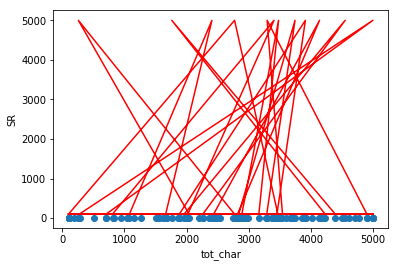

In [12]:
# plot the class predictions
plt.scatter(OW.SR, OW.tot_char)
plt.plot(OW.SR, OW.rank_pred, color='red')
plt.xlabel('tot_char')
plt.ylabel('SR')

In [13]:
logreg.predict_proba(X)

array([[  4.58049583e-01,   3.82102539e-04,   6.50650152e-05, ...,
          4.06763054e-03,   1.67176404e-02,   3.00084360e-03],
       [  5.30743089e-02,   5.68516188e-03,   3.14713514e-03, ...,
          1.17560958e-02,   1.71239707e-02,   1.78957976e-02],
       [  1.03590314e-02,   1.15455447e-02,   1.14628224e-02, ...,
          1.07500386e-02,   9.53573127e-03,   2.15578441e-02],
       ..., 
       [  2.42883195e-02,   8.59342888e-03,   6.40522292e-03, ...,
          1.18026892e-02,   1.33280303e-02,   2.10733181e-02],
       [  3.12710518e-01,   8.79951511e-04,   2.01024238e-04, ...,
          6.22825037e-03,   1.97559972e-02,   5.52094014e-03],
       [  1.05896742e-01,   3.38360391e-03,   1.39287599e-03, ...,
          1.05579069e-02,   1.99235876e-02,   1.34779992e-02]])

In [14]:
# store the predicted probabilites of class 1
OW['rank_predict_prob'] = logreg.predict_proba(X)[:, 1]
OW.head()

,player,SR,totGames,tot_char,rank,rank_pred,rank_predict_prob
0,2,2258,79,7,Gold,100,0.000382
1,3,808,233,3,Bronze,100,0.005685
2,4,3408,476,1,Diamond,5000,0.011546
3,5,2021,646,4,Gold,100,0.003384
4,6,1562,443,2,Silver,100,0.008593


---
### Cited Sources: 
Overwatch player statistics: https://www.pcgamesn.com/overwatch/overwatch-sales-numbers, https://www.statista.com/statistics/618035/number-gamers-overwatch-worldwide/
Ovewatch character data: https://overwatch.gamepedia.com/Heroes